### Step 1: Importing libraries and packages

In [291]:
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Regression libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Suppress warnings
import warnings
warnings.filterwarnings(action = 'ignore')

### Step 2: Reading and Understanding the Data

In [292]:
bike_df = pd.read_csv("day.csv")

### Step 3: Data Understanding, Preparation

In [293]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [294]:
bike_df.shape

(730, 16)

In [295]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [296]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


##### Data Quality Check

##### Checking for NULL/MISSING values

In [297]:
# percentage of missing values in column
round(100*(bike_df.isnull().sum()/len(bike_df)), 2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [298]:
# percentage of missing values in row
round((bike_df.isnull().sum(axis=1)/len(bike_df))*100,2).sort_values(ascending=False)

729    0.0
0      0.0
1      0.0
2      0.0
3      0.0
      ... 
29     0.0
30     0.0
31     0.0
32     0.0
33     0.0
Length: 730, dtype: float64

No missing/NULL values found

#### Data Cleaning and Manipulation

In [299]:
# Drop duplicates
bike_df.drop_duplicates(inplace = True)

In [300]:
bike_df.shape

(730, 16)

##### It seems there are no duplicates in the dataset.

#### Removing redundant & unwanted columns

****1. Dropped `casual` and `registered` as its not relevent to total bike count.****

****2. Dropped `instant` as it contains indexing numbers.****

****3. Dropped `dteday` since `mnth` and `yr` columns can be enough for date information.****

In [301]:
bike_df.drop(['casual', 'dteday', 'instant', 'registered'], axis = 1, inplace = True)

In [302]:
bike_df.shape

(730, 12)

### Step 4. Data Conversion

***Converting and mapping `weekday` into a categorical variable like 0:'sun',1:'mon'***

In [303]:
bike_df.weekday  = bike_df.weekday .map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [304]:
bike_df['weekday'].value_counts(ascending = False)

weekday
sat    105
sun    105
mon    105
tue    104
thu    104
fri    104
wed    103
Name: count, dtype: int64

***Converting and mapping `mnth` into a categorical variable like 1:January, 2:February***

In [305]:
bike_df.mnth = bike_df.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [306]:
bike_df['mnth'].value_counts(ascending = False)

mnth
jan     62
mar     62
july    62
may     62
dec     62
oct     62
aug     62
apr     60
sep     60
june    60
nov     60
feb     56
Name: count, dtype: int64

***Converting `season` into a categorical variable***

In [307]:
bike_df.season = bike_df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

***Converting `weathersit` into a categorical variable***

In [308]:
bike_df.weathersit = bike_df.weathersit.map({1:'Clear',2:'Mist',3:'Light_snow_rain',4:'Heavy_snow_rain'})

In [309]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### Step 4. Exploratory Data Analysis 

##### Draw box plots for independent variables with continuous values

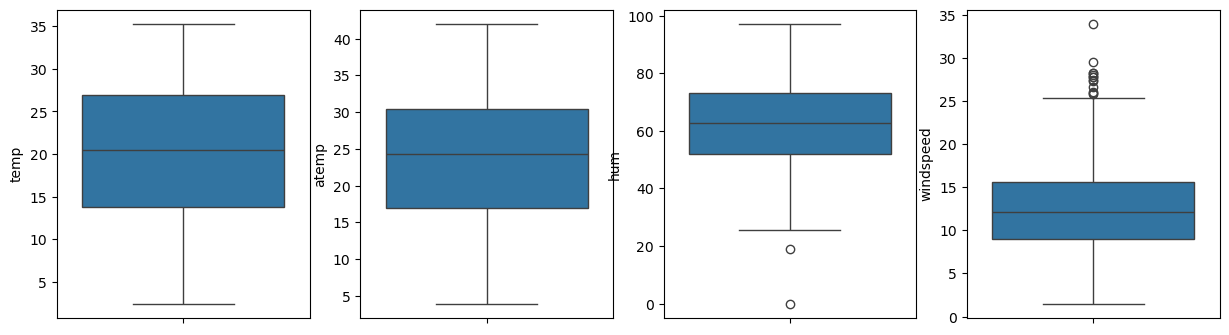

In [310]:
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(15,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bike_df)
    i+=1

##### Visualising Numeric Variables using pairplot

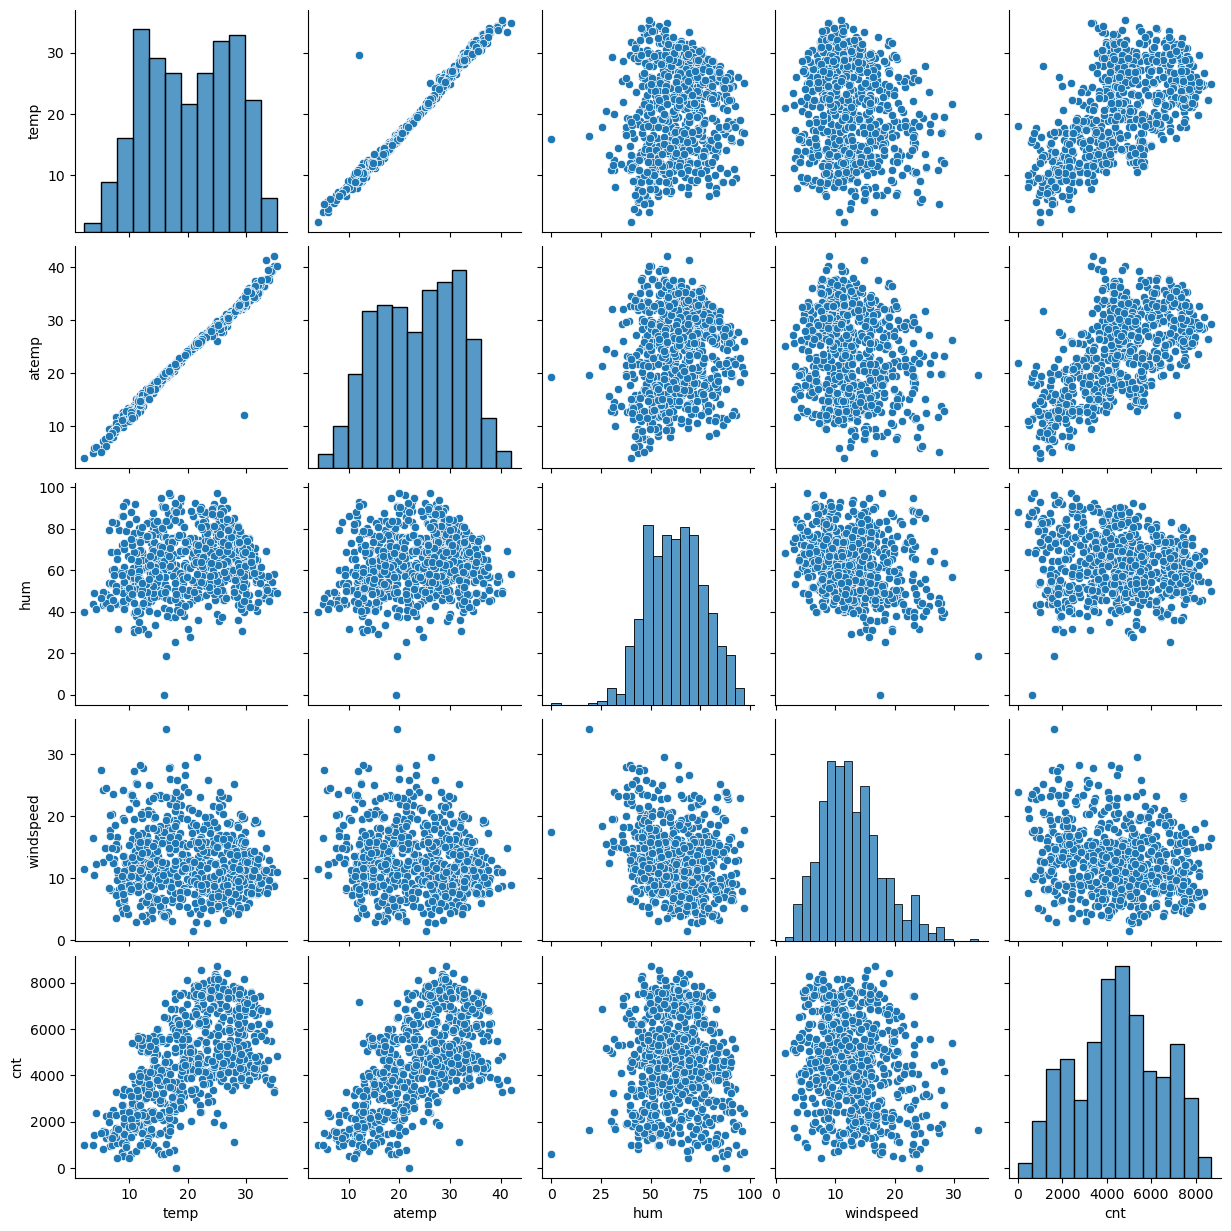

In [311]:
sns.pairplot(data=bike_df,vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

#### Observations: ####
1. No outliers to be handled.
2. temp and atemp has highest correlation with the target variable cnt.
3. temp and atemp are highly correlated with each other.

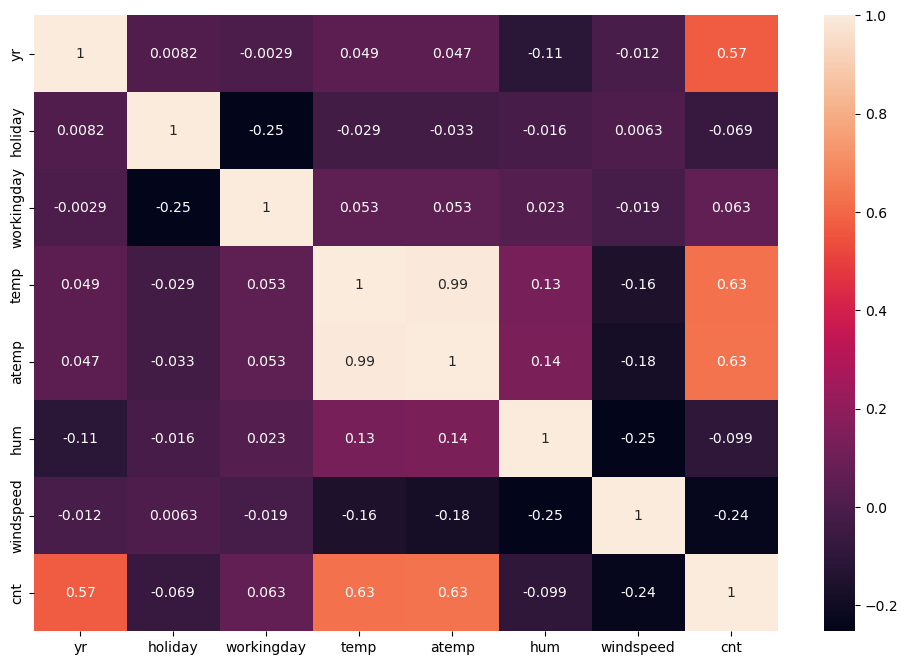

In [312]:
#correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (12, 8))
sns.heatmap(bike_df.corr(numeric_only = True), annot = True)
plt.show()

#### Observations: ####

1. There is a negative correlation between cnt and holiday, hum, and windspeed
2. There is a positive correlation between cnt and yr, workingday, temp and atemp
3. There is a high correlation observed between temp and atemp.

##### Visualising Categorical Variables

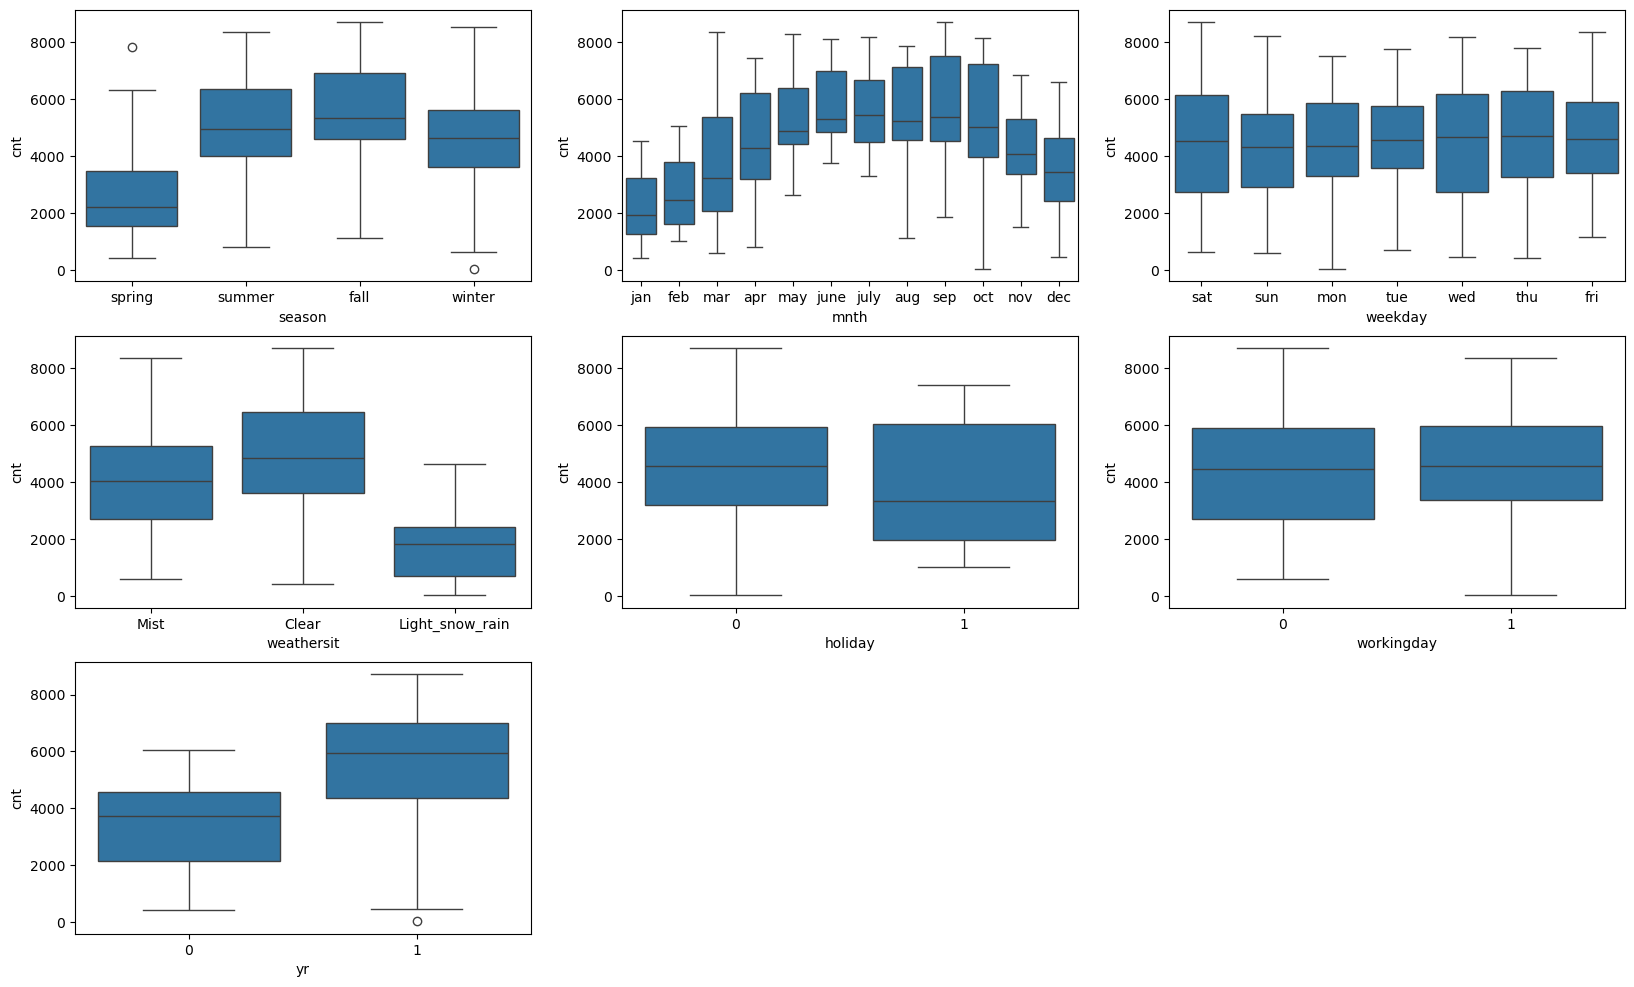

In [313]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_df)
plt.subplot(3,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_df)
plt.subplot(3,3,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_df)
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_df)
plt.subplot(3,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_df)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_df)
plt.subplot(3,3,7)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_df)
plt.show()

<Figure size 3000x2000 with 0 Axes>

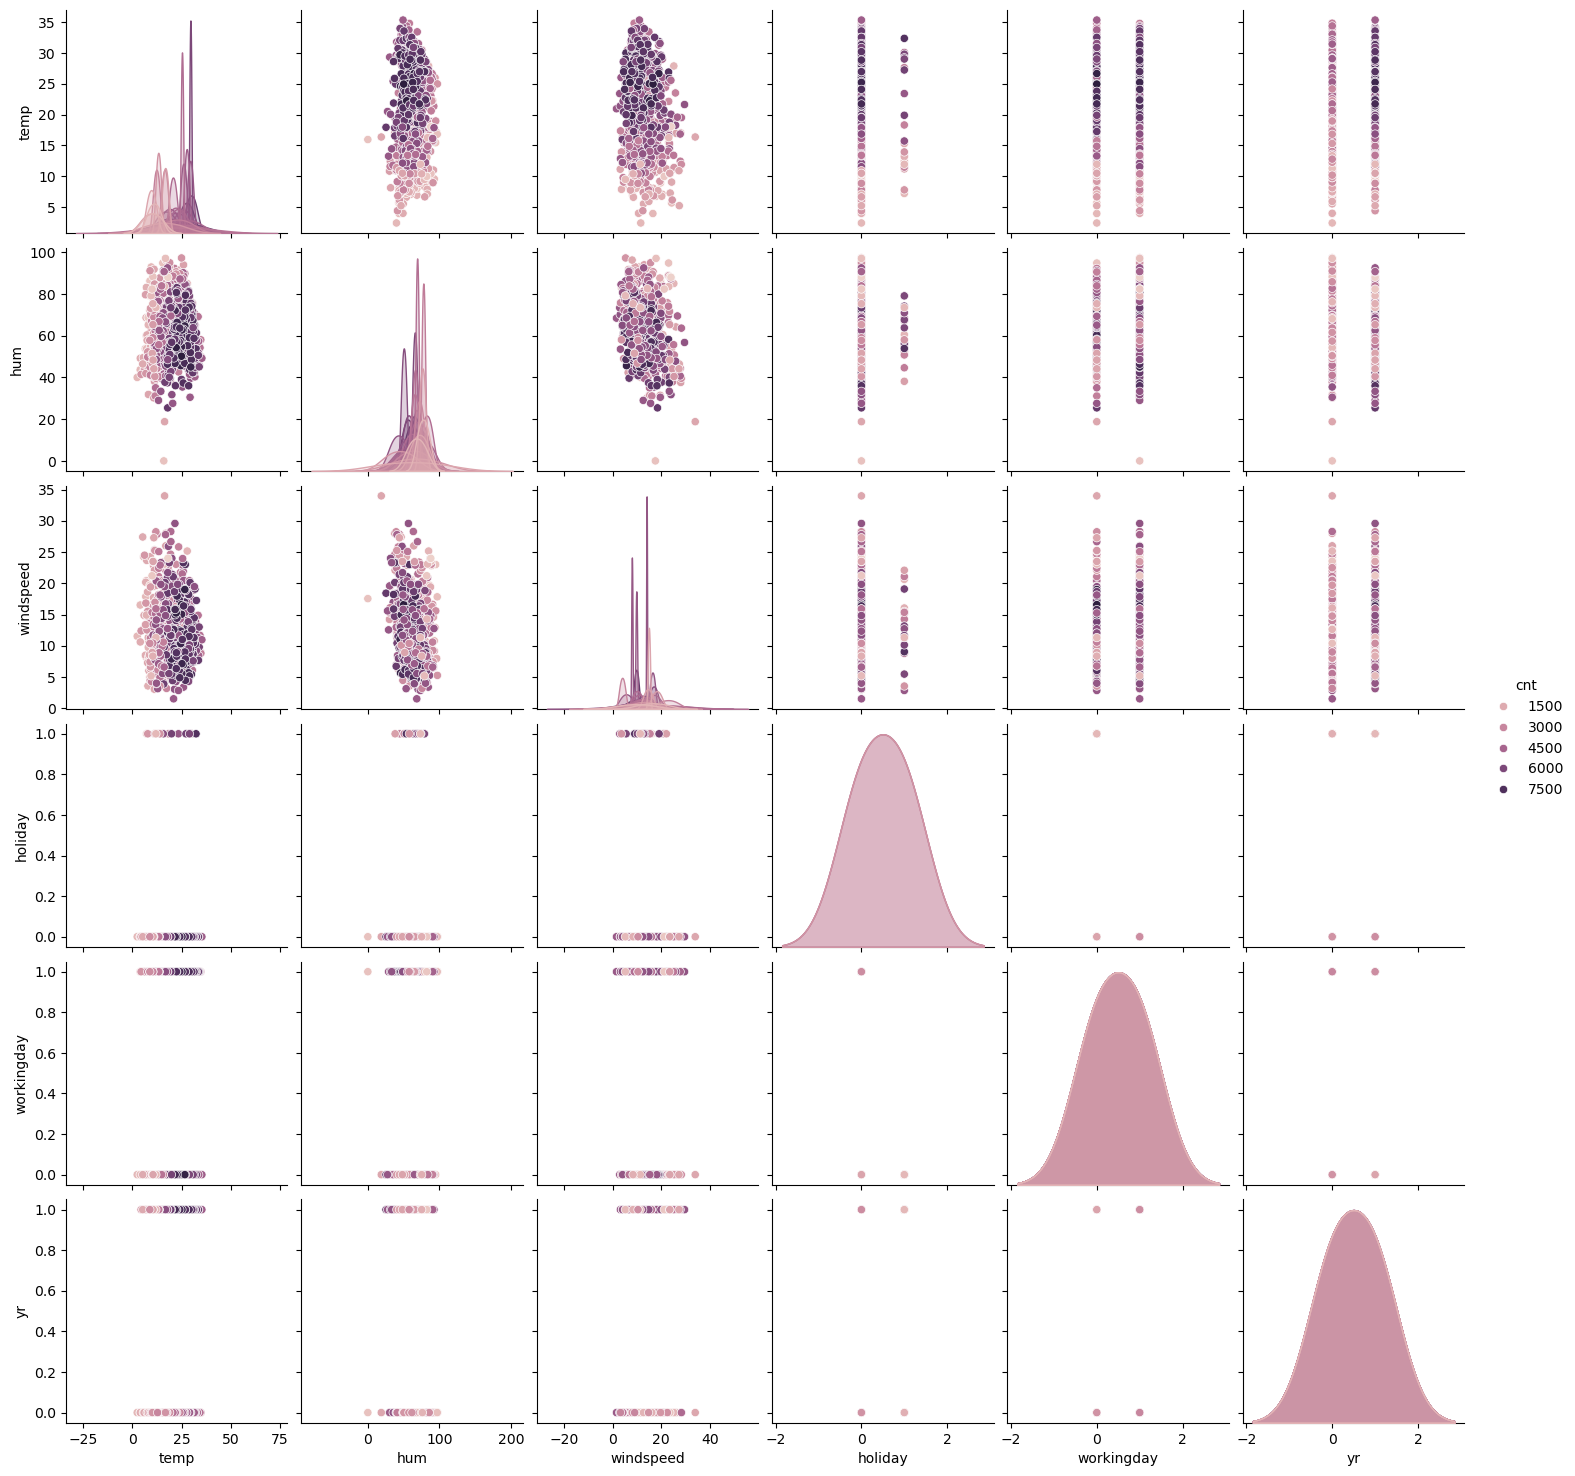

In [314]:
plt.figure(figsize = (30, 20))
sns.pairplot(data = bike_df, vars = ['temp', 'hum', 'windspeed', 'holiday', 'workingday', 'yr'], hue = 'cnt')
plt.show()

#### Observations: ####

1. Season: Fall has highest demand for rental bikes
2. On holiday, demand has decreased.
3. Demand for next year is increasing.
4. Every month the demand for rental bike is increasing till June.
5. September has the highest number of demand then it's decreasing.
6. During weekdays and workingdays demands don't have that much of variation.
7. Clear weathersit has highest demand

### Step 5 Data Preparation

#### Dummy Variables


In [315]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [316]:
cat_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
bike_df[cat_cols].nunique()

season         4
yr             2
mnth          12
holiday        2
weekday        7
workingday     2
weathersit     3
dtype: int64

#### Observations
categorical variables - season, mnth, weekday, and weathersit have more than 2 unique values. Will create dummy variablesfor these columns

In [317]:
bike_df = pd.get_dummies(data = bike_df, columns = ['season', 'mnth', 'weekday', 'weathersit'], drop_first = True)

In [318]:
bike_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snow_rain,weathersit_Mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,True,False,...,False,False,False,True,False,False,False,False,False,True
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,True,False,...,False,False,True,False,False,False,False,False,False,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,True,False,...,False,False,False,False,False,False,True,False,False,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,True,False,...,False,False,False,False,False,False,False,True,False,False


In [319]:
bike_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_july', 'mnth_june',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_Light_snow_rain',
       'weathersit_Mist'],
      dtype='object')

### Step 6 Model Building

##### Splitting the Data into Training and Testing Sets

In [320]:
# split the dataframe into train and test
np.random.seed(0)
df_train, df_test = train_test_split(bike_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [321]:
df_train.shape

(510, 30)

In [322]:
df_test.shape

(219, 30)

##### Rescaling the Features

In [323]:
#Using MinMaxScaler to Rescaling the features
scaler = MinMaxScaler()

In [324]:
# verifying the head of dataset before scaling.
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snow_rain,weathersit_Mist
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,False,False,...,True,False,False,False,False,False,True,False,False,False
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,False,False,...,False,False,False,False,False,False,True,False,False,False
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,True,False,...,False,False,False,True,False,False,False,False,False,True
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,True,False,...,False,False,False,False,True,False,False,False,False,False
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,False,True,...,False,False,False,True,False,False,False,False,False,True


In [325]:
# Applying scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['temp','atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [326]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snow_rain,weathersit_Mist
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,False,False,...,True,False,False,False,False,False,True,False,False,False
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,False,False,...,False,False,False,False,False,False,True,False,False,False
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,True,False,...,False,False,False,True,False,False,False,False,False,True
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,True,False,...,False,False,False,False,True,False,False,False,False,False
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,False,True,...,False,False,False,True,False,False,False,False,False,True


In [327]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


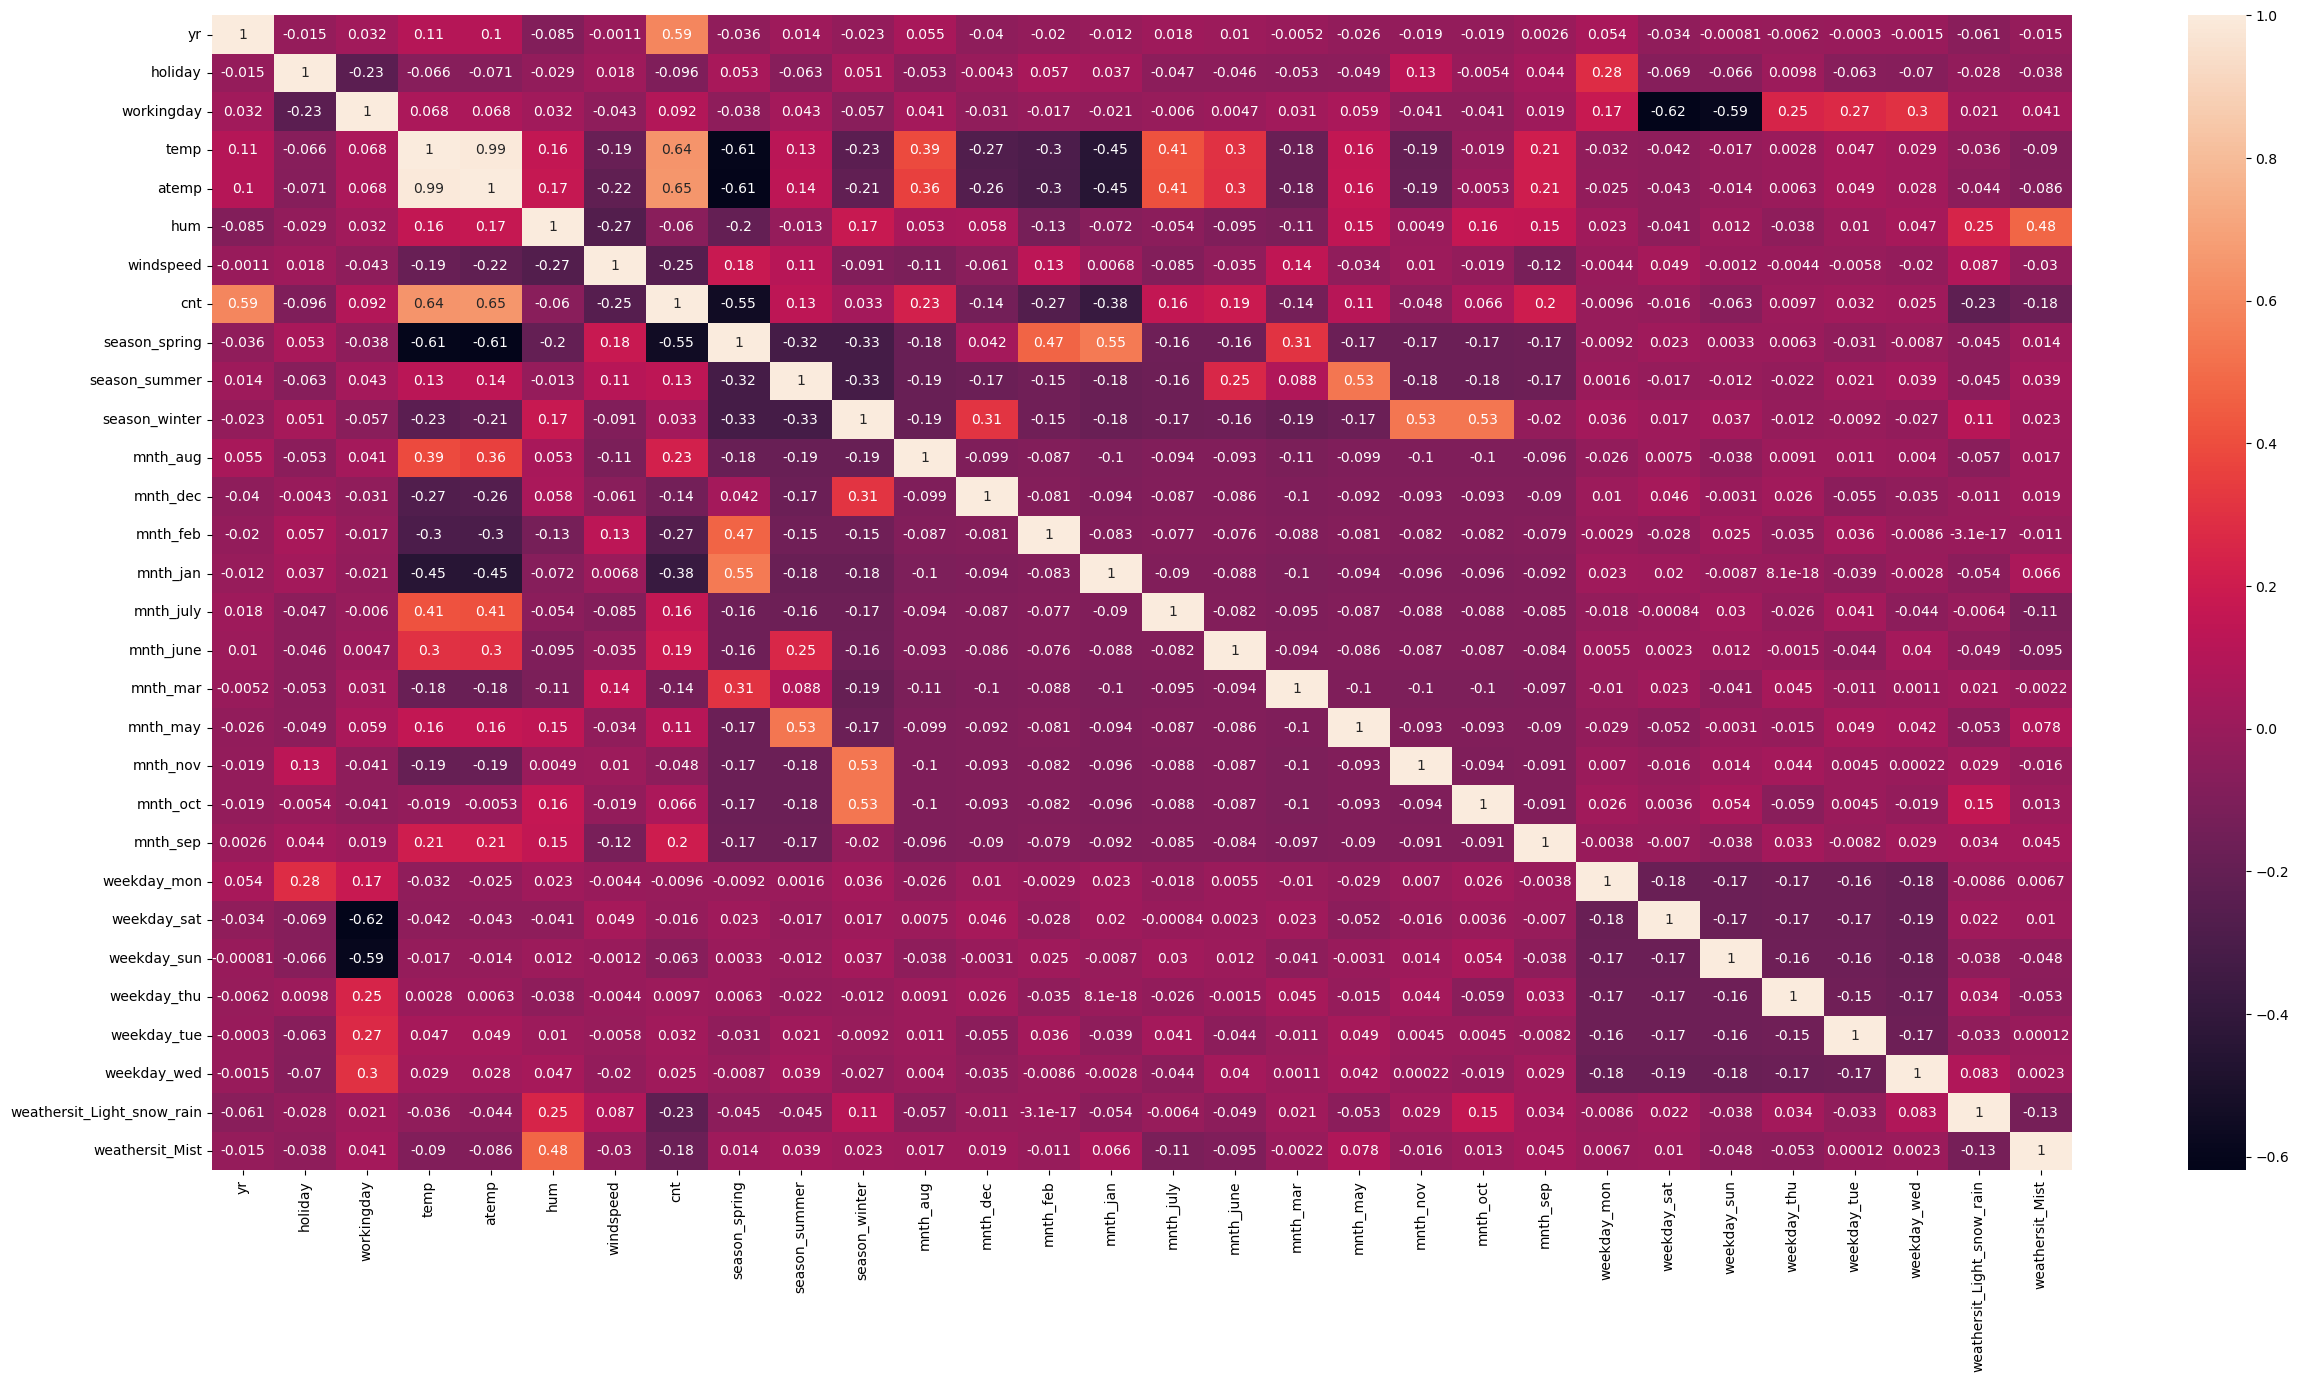

In [328]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30, 15))
sns.heatmap(df_train.corr(), annot = True)
plt.show()

#### Observations: 
<b>yr</b> and <b>temp</b> seems correlated with <b>cnt</b> the most.

Create a regplot for <b>temp vs cnt</b>.

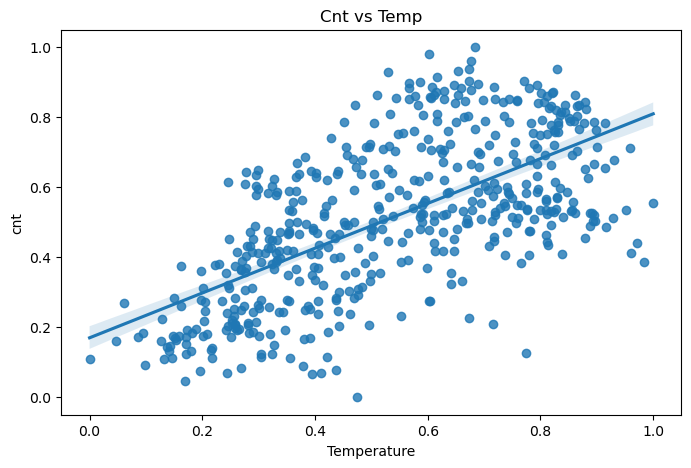

In [329]:
plt.figure(figsize=(8,5))
plt.title("Cnt vs Temp")
sns.regplot(data=df_train,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.show()

#### Observations:
From above visualization we can say that cnt and temp are having positive correlation.

##### Splitting the dataset into training and test set

In [330]:
# Getting the feature variables in X and dependent variable `cnt` in y
X = bike_df.drop('cnt', axis = 1)
y = bike_df['cnt']

In [331]:
# Splitting the data into a 70% training set and a 30% test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [332]:
# Checking shape and size for train and test set
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(511, 29)
(511,)
(219, 29)
(219,)


In [333]:
# Inspect the head of the training set
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snow_rain,weathersit_Mist
653,1,0,1,19.201653,23.0423,55.8333,12.208807,False,False,True,...,True,False,False,False,False,False,True,False,False,False
576,1,0,1,29.246653,33.1448,70.4167,11.083475,False,False,False,...,False,False,False,False,False,False,True,False,False,False
426,1,0,0,16.980847,20.6746,62.1250,10.792293,True,False,False,...,False,False,False,True,False,False,False,False,False,True
728,1,0,0,10.489153,11.5850,48.3333,23.500518,True,False,False,...,False,False,False,False,True,False,False,False,False,False
482,1,0,0,15.443347,18.8752,48.9583,8.708325,False,True,False,...,False,False,False,True,False,False,False,False,False,True


##### Scaling using StandardScaler


In [334]:
# Use StandardScaler to scale values
scaler = StandardScaler()

# Fit and transform training set
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns, index = X_train.index)

# Only Transform Test set
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns, index = X_test.index)

In [335]:
# Inspect the training set after scaling
X_train_scaled.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snow_rain,weathersit_Mist
653,0.98254,-0.161569,0.690564,-0.121991,-0.056605,-0.514975,-0.118309,-0.566051,-0.572078,1.738857,...,3.257858,-0.295354,-0.421212,-0.427633,-0.408248,-0.391789,2.552392,-0.434019,-0.173902,-0.724826
576,0.98254,-0.161569,0.690564,1.232298,1.194457,0.517177,-0.331370,-0.566051,-0.572078,-0.575091,...,-0.306950,-0.295354,-0.421212,-0.427633,-0.408248,-0.391789,2.552392,-0.434019,-0.173902,-0.724826
426,0.98254,-0.161569,-1.448092,-0.421405,-0.349813,-0.069675,-0.386500,1.766626,-0.572078,-0.575091,...,-0.306950,-0.295354,-0.421212,2.338451,-0.408248,-0.391789,-0.391789,-0.434019,-0.173902,1.379641
728,0.98254,-0.161569,-1.448092,-1.296629,-1.475441,-1.045794,2.019569,1.766626,-0.572078,-0.575091,...,-0.306950,-0.295354,-0.421212,-0.427633,2.449490,-0.391789,-0.391789,-0.434019,-0.173902,-0.724826
482,0.98254,-0.161569,-1.448092,-0.628694,-0.572645,-1.001559,-0.781062,-0.566051,1.748015,-0.575091,...,-0.306950,-0.295354,-0.421212,2.338451,-0.408248,-0.391789,-0.391789,-0.434019,-0.173902,1.379641


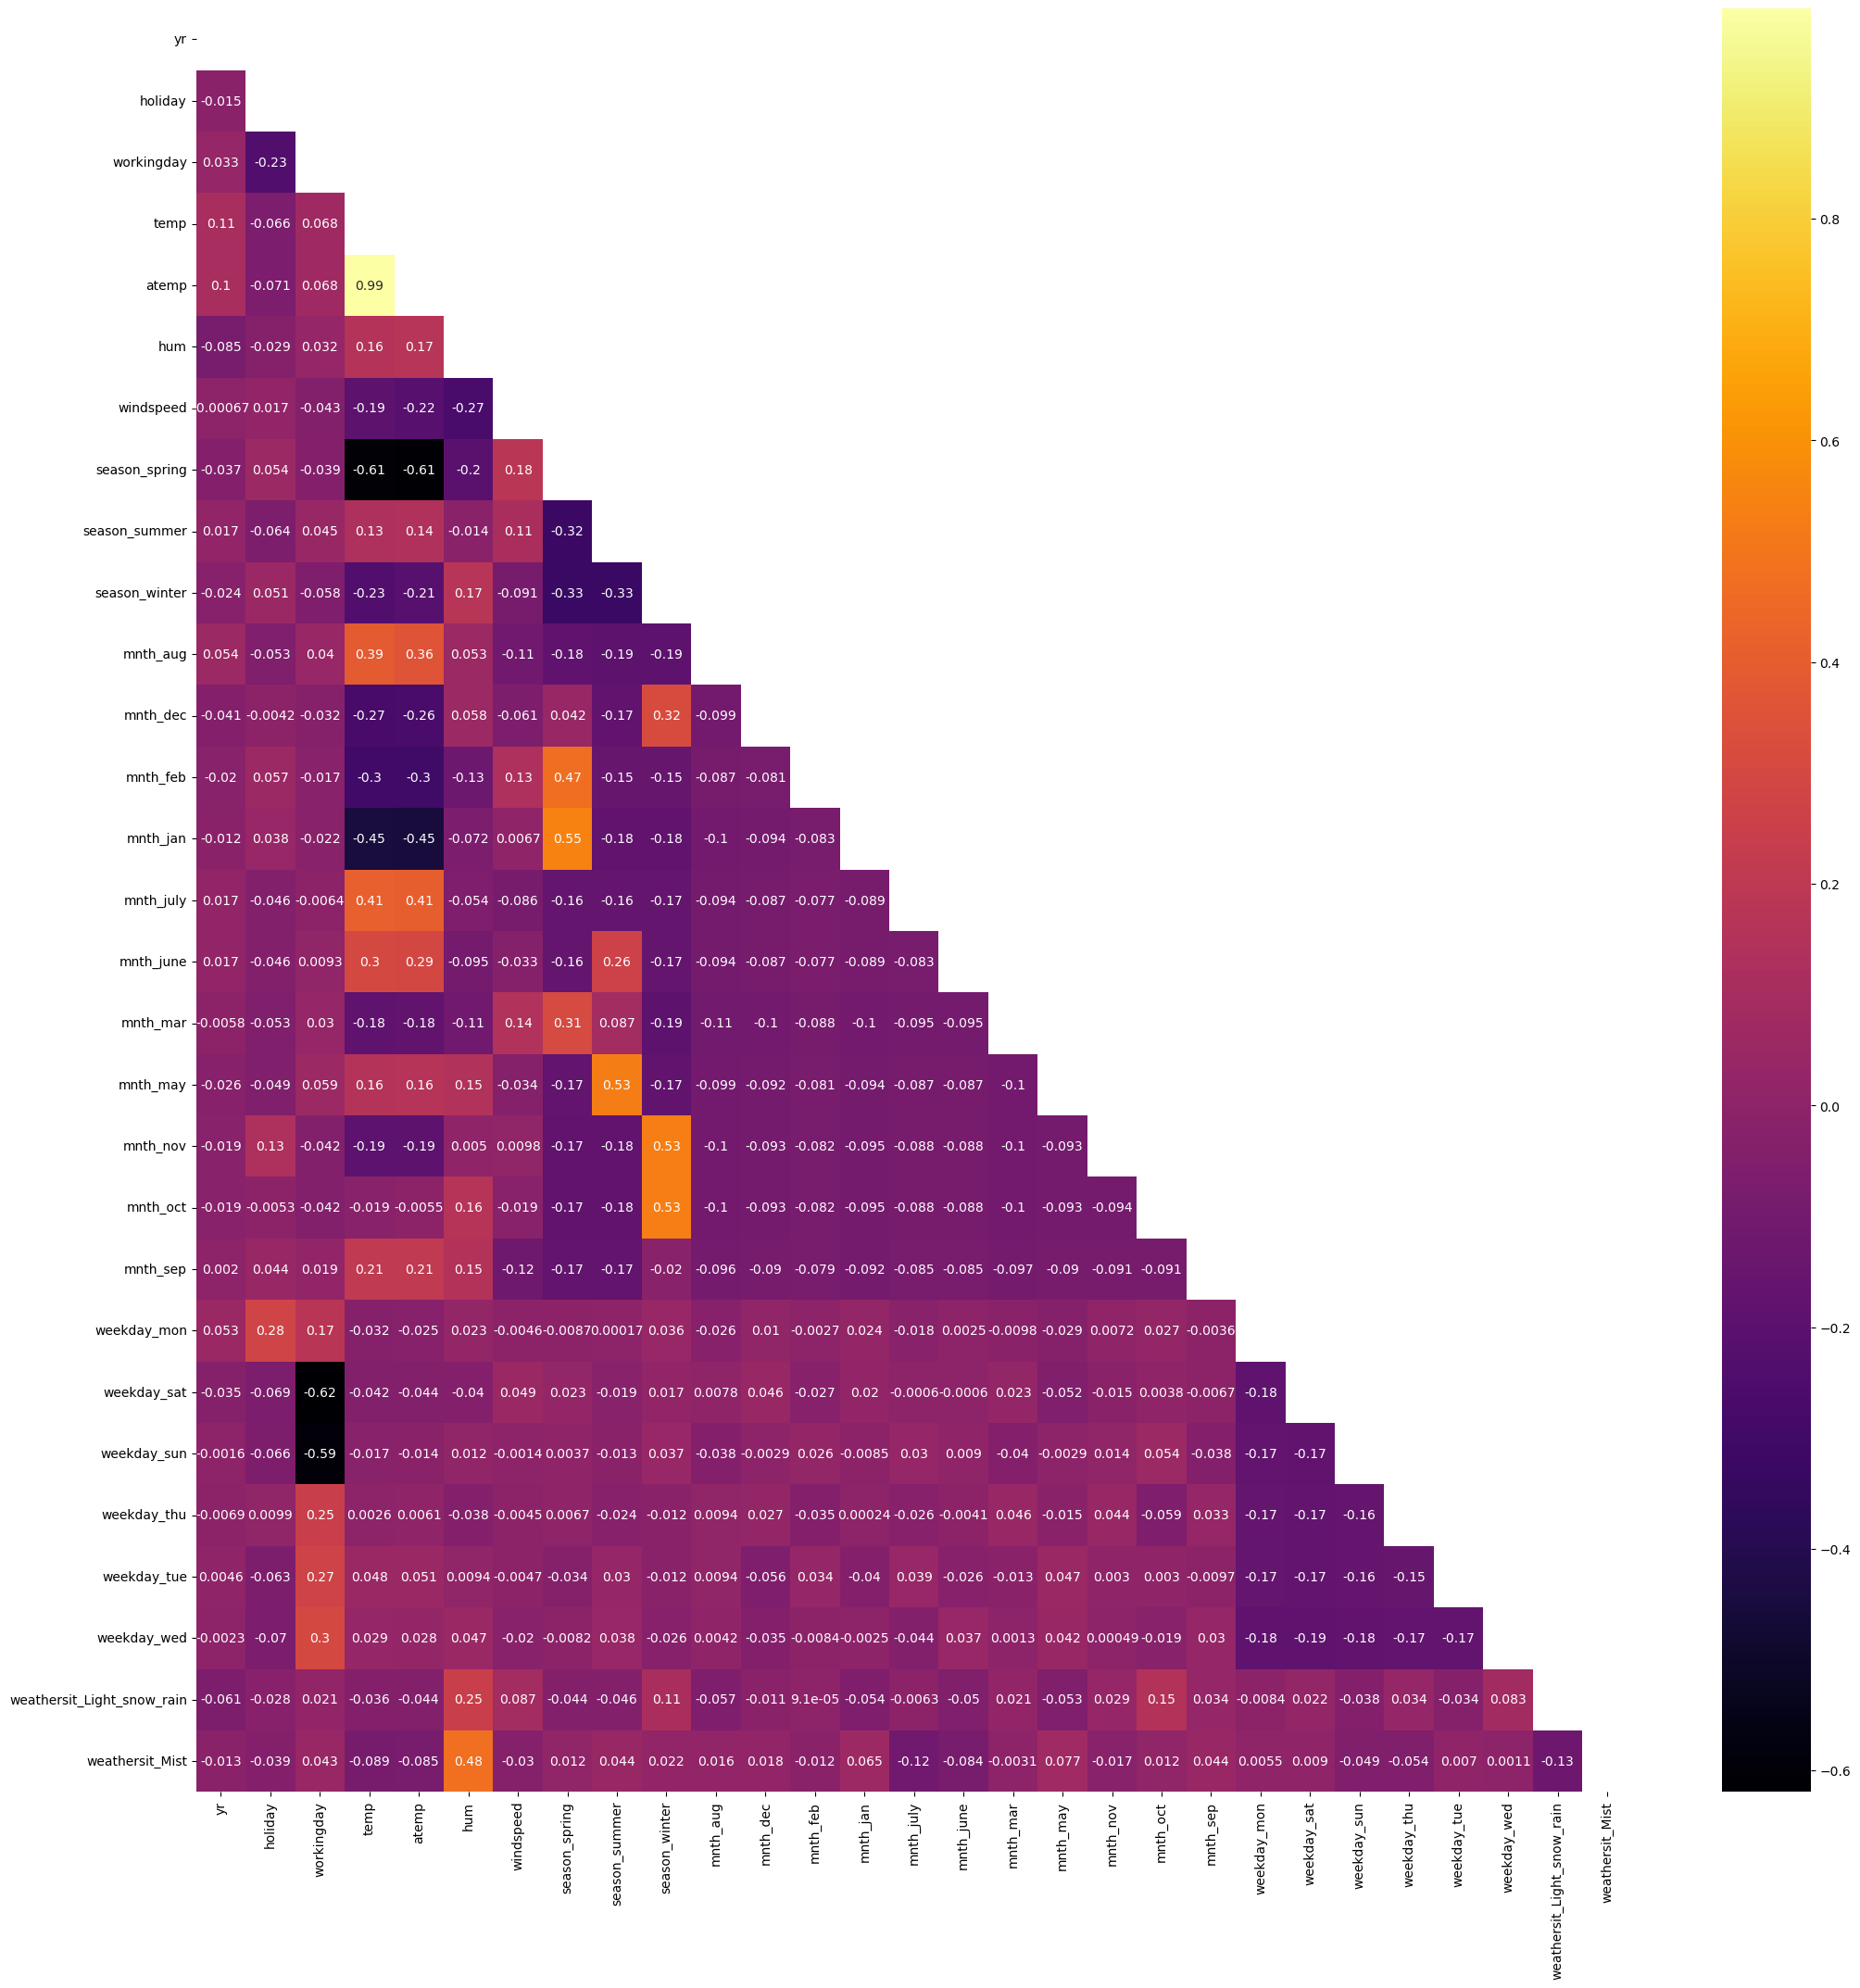

In [336]:
# Inspecting the correlation in the training dataframe
plt.figure(figsize = (25, 25))
matrix = np.triu(X_train_scaled.corr())
sns.heatmap(X_train_scaled.corr(), annot = True, cmap = "inferno", mask = matrix)
plt.show()

##### Observations:
1. November and October correlate strongly with Winter
2. May has a high correlation with Summer
3. hum is positively correlated with Moderate

In [337]:
# Create and train the model with RFE
lm = LinearRegression()

rfe = RFE(lm, n_features_to_select = 15)

rfe = rfe.fit(X_train_scaled, y_train)

In [338]:
rfe.support_

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False, False, False, False,  True, False, False, False,
       False, False,  True, False,  True,  True, False, False, False,
        True,  True])

In [339]:
# List of feature variables and their respective selection status and ranks
list(zip(X_train_scaled.columns, rfe.support_, rfe.ranking_))

[('yr', np.True_, np.int64(1)),
 ('holiday', np.True_, np.int64(1)),
 ('workingday', np.True_, np.int64(1)),
 ('temp', np.True_, np.int64(1)),
 ('atemp', np.False_, np.int64(6)),
 ('hum', np.True_, np.int64(1)),
 ('windspeed', np.True_, np.int64(1)),
 ('season_spring', np.True_, np.int64(1)),
 ('season_summer', np.True_, np.int64(1)),
 ('season_winter', np.True_, np.int64(1)),
 ('mnth_aug', np.False_, np.int64(9)),
 ('mnth_dec', np.False_, np.int64(4)),
 ('mnth_feb', np.False_, np.int64(5)),
 ('mnth_jan', np.False_, np.int64(2)),
 ('mnth_july', np.True_, np.int64(1)),
 ('mnth_june', np.False_, np.int64(14)),
 ('mnth_mar', np.False_, np.int64(15)),
 ('mnth_may', np.False_, np.int64(7)),
 ('mnth_nov', np.False_, np.int64(3)),
 ('mnth_oct', np.False_, np.int64(13)),
 ('mnth_sep', np.True_, np.int64(1)),
 ('weekday_mon', np.False_, np.int64(8)),
 ('weekday_sat', np.True_, np.int64(1)),
 ('weekday_sun', np.True_, np.int64(1)),
 ('weekday_thu', np.False_, np.int64(11)),
 ('weekday_tue', np.F

In [340]:
# Get the columns which are selected using RFE approach
selected_features = X_train_scaled.columns[rfe.support_]

In [341]:
# Verifying column names which are selected
selected_features

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_july',
       'mnth_sep', 'weekday_sat', 'weekday_sun', 'weathersit_Light_snow_rain',
       'weathersit_Mist'],
      dtype='object')

In [342]:
# Get the columns which are rejected using RFE approach
rejected_features = X_train_scaled.columns[~rfe.support_]

In [343]:
# Verifying column names which are rejected
rejected_features

Index(['atemp', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_june',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'weekday_mon',
       'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [344]:
def adjusted_r2_score(y_true, y_pred, n_features):
    """
    Calculate the adjusted R-squared (R2_adj) score.

    The adjusted R2 score is a modified version of the traditional R-squared that takes into account the number of
    predictors (independent variables) in a regression model. It penalizes the inclusion of unnecessary predictors
    that do not significantly contribute to explaining the variance.

    Parameters:
    - y_true (array-like): True target values.
    - y_pred (array-like): Predicted values.
    - n_features (int): Number of features (independent variables) in the model.

    Returns:
    - float: Adjusted R-squared score.
    """
    r2 = r2_score(y_true, y_pred)
    n = len(y_true)
    adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - n_features - 1))
    return adjusted_r2

In [345]:
def calculate_VIF(X_train):
    """
    Calculate Variance Inflation Factor (VIF) for features in the training set.

    VIF measures the extent to which the variance of an independent variable is inflated by the existence of other 
    independent variables in the model. High VIF values indicate strong correlation between variables.

    Parameters:
    - X_train (pd.DataFrame): Input features in the training set.

    Returns:
    - pd.DataFrame: DataFrame containing Features and their corresponding VIF values.
    """
    vif = pd.DataFrame()
    vif["Features"] = X_train.columns
    vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(len(X_train.columns))]
    
    vif['VIF'] = round(vif['VIF'], 2)
    return vif.sort_values(by = 'VIF', ascending = False)

In [346]:
def generate_model_with_summary(X_train, y_train):
    """
    Generate and fit an Ordinary Least Squares (OLS) model using statsmodels,
    print the model summary, and return a dictionary with the fitted model and
    the features with an added constant term.

    Parameters:
    - X_train (DataFrame): Features for training.
    - y_train (Series): Target variable for training.

    Returns:
    dict: A dictionary containing the fitted OLS model ('model') and the features
          with added constant term ('X_train_sm').
    """
    X_train_sm = sm.add_constant(X_train)
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return { 'model' : lm, 'X_train_sm' : X_train_sm }

##### Creating our first model using the selected features from RFE approach

In [347]:
X_train_rfe_1 = X_train_scaled[selected_features]

In [348]:
generate_model_with_summary(X_train_rfe_1, y_train)
calculate_VIF(X_train_rfe_1)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.29e-191
Time:                        12:57:36   Log-Likelihood:                -4117.4
No. Observations:                 511   AIC:                             8265.
Df Residuals:                     496   BIC:                             8328.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

,Features,VIF
1,holiday,inf
2,workingday,inf
12,weekday_sun,inf
11,weekday_sat,inf
6,season_spring,5.02
3,temp,3.60
8,season_winter,3.49
7,season_summer,2.62
4,hum,1.90
14,weathersit_Mist,1.56


Excluding `holiday` due to its high VIF approaching `inf`, indicating potential multicollinearity

In [349]:
X_train_rfe_2 = X_train_rfe_1.drop(['holiday'], axis = 1)

In [350]:
generate_model_with_summary(X_train_rfe_2, y_train)
calculate_VIF(X_train_rfe_2)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.2
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          7.31e-192
Time:                        12:57:36   Log-Likelihood:                -4116.8
No. Observations:                 511   AIC:                             8264.
Df Residuals:                     496   BIC:                             8327.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

,Features,VIF
1,workingday,9.08
10,weekday_sat,6.06
11,weekday_sun,5.74
5,season_spring,5.02
2,temp,3.62
7,season_winter,3.50
6,season_summer,2.62
3,hum,1.91
13,weathersit_Mist,1.57
8,mnth_july,1.49


##### Dropping spring because it has very high VIF

In [351]:
X_train_rfe_3 = X_train_rfe_2.drop(['season_spring'], axis = 1)

In [352]:
generate_model_with_summary(X_train_rfe_3, y_train)
calculate_VIF(X_train_rfe_3)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     208.2
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.72e-191
Time:                        12:57:36   Log-Likelihood:                -4120.5
No. Observations:                 511   AIC:                             8269.
Df Residuals:                     497   BIC:                             8328.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

,Features,VIF
1,workingday,9.07
9,weekday_sat,6.06
10,weekday_sun,5.74
3,hum,1.88
2,temp,1.60
12,weathersit_Mist,1.56
7,mnth_july,1.43
5,season_summer,1.33
6,season_winter,1.29
11,weathersit_Light_snow_rain,1.24


##### Droppping Sunday because it has a high p-value and high VIF value

In [353]:
X_train_rfe_4 = X_train_rfe_3.drop(['weekday_sun'], axis = 1)

In [354]:
final_lr_model = generate_model_with_summary(X_train_rfe_4, y_train)
calculate_VIF(X_train_rfe_4)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     223.3
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.36e-191
Time:                        12:57:36   Log-Likelihood:                -4123.1
No. Observations:                 511   AIC:                             8272.
Df Residuals:                     498   BIC:                             8327.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

,Features,VIF
3,hum,1.88
1,workingday,1.65
9,weekday_sat,1.64
2,temp,1.60
11,weathersit_Mist,1.56
7,mnth_july,1.43
5,season_summer,1.33
6,season_winter,1.29
10,weathersit_Light_snow_rain,1.24
8,mnth_sep,1.19


#### The model is deemed satisfactory with a remarkably low Prob (F-statistic) of 1.36e-191 , features displaying low p-values and VIF, and $R^2$ and Adjusted $R^2$ values of 0.843 and 0.84. This will serve as the final evaluation model.

In [355]:
### Residual Analysis


In [356]:
# Fetch the final model and the X_train_sm from the final_lr_model
model, X_train_sm = final_lr_model.values()

In [357]:
final_lr_model

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x7297b703f530>,
 'X_train_sm':      const       yr  workingday      temp       hum  windspeed  season_summer  \
 653    1.0  0.98254    0.690564 -0.121991 -0.514975  -0.118309      -0.572078   
 576    1.0  0.98254    0.690564  1.232298  0.517177  -0.331370      -0.572078   
 426    1.0  0.98254   -1.448092 -0.421405 -0.069675  -0.386500      -0.572078   
 728    1.0  0.98254   -1.448092 -1.296629 -1.045794   2.019569      -0.572078   
 482    1.0  0.98254   -1.448092 -0.628694 -1.001559  -0.781062       1.748015   
 ..     ...      ...         ...       ...       ...        ...            ...   
 578    1.0  0.98254    0.690564  1.448801  0.201630  -0.788939      -0.572078   
 53     1.0 -1.01777    0.690564 -1.485091 -1.472501  -1.235979      -0.572078   
 350    1.0 -1.01777   -1.448092 -1.282810 -0.497281   0.654804      -0.572078   
 79     1.0 -1.01777    0.690564 -0.331480  0.752323   1.233453       1.74

In [358]:
# Calculate y_train_pred
y_train_pred = model.predict(X_train_sm)

<Figure size 800x500 with 0 Axes>

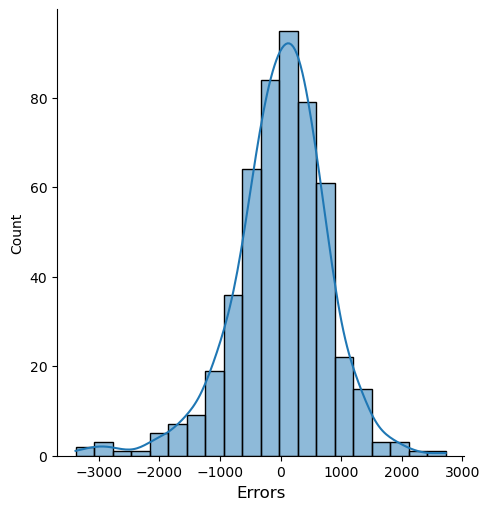

In [359]:
# Plot the histogram of the error terms on the training set
residuals = y_train - y_train_pred
fig = plt.figure(figsize = (8, 5))
sns.displot(residuals, bins = 20, kde = True)
plt.xlabel('Errors', fontsize = 12)
plt.show()

##### # Calculate mean squared error of the training set

In [360]:
mse_train = mean_squared_error(y_train, y_train_pred)

# Calculate RMSE
rmse_train = np.sqrt(mse_train)

print(rmse_train)

772.5196460522519


In [361]:
# Retain only the selected feature from the final model
X_test_scaled = X_test_scaled[X_train_rfe_4.columns]
X_test_scaled.head()

,yr,workingday,temp,hum,windspeed,season_summer,season_winter,mnth_july,mnth_sep,weekday_sat,weathersit_Light_snow_rain,weathersit_Mist
184,-1.01777,-1.448092,1.306004,0.048287,-1.396242,-0.572078,-0.575091,3.478874,-0.295354,-0.427633,-0.173902,1.379641
535,0.98254,0.690564,1.614633,-0.276107,-0.986093,1.748015,-0.575091,-0.287449,-0.295354,-0.427633,-0.173902,-0.724826
299,-1.01777,0.690564,-0.112776,1.286864,0.078844,-0.572078,1.738857,-0.287449,-0.295354,-0.427633,-0.173902,1.379641
221,-1.01777,0.690564,1.527113,-1.464546,0.110494,-0.572078,-0.575091,-0.287449,-0.295354,-0.427633,-0.173902,-0.724826
152,-1.01777,0.690564,1.241512,-2.307960,1.277902,1.748015,-0.575091,-0.287449,-0.295354,-0.427633,-0.173902,-0.724826


In [370]:
# Add constant to the test set
X_test_sm = sm.add_constant(X_test_scaled)

In [363]:
# Get the predicted values from the linear model
y_test_pred = model.predict(X_test_sm)

#### Calculating $R^2$ Scores and Adjusted $R^2$ Scores for the test set

In [364]:
# Calculate R2 Score for the test set
r2_score_test = r2_score(y_true = y_test, y_pred = y_test_pred)
r2_score_test = round(r2_score_test, 2)
r2_score_test

0.81

In [365]:
# Calculate Adjusted R2 Score for the test set
adj_r2_score_test = round(adjusted_r2_score(y_test, y_test_pred, n_features = len(X_test_scaled.columns)), 2)
adj_r2_score_test

0.79

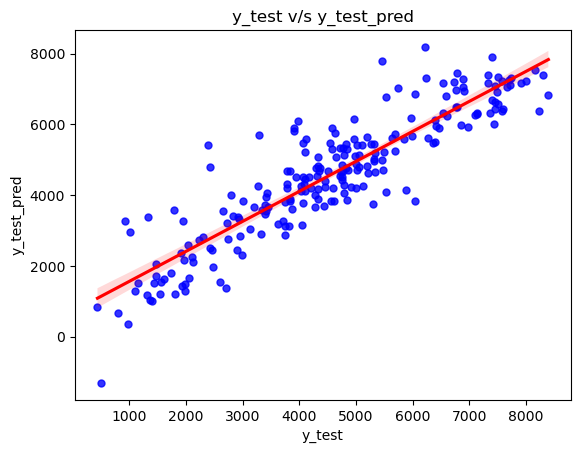

In [366]:
# Visualize the predicted model using a scatter plot with a linear regression fit line
sns.regplot(x = y_test, y = y_test_pred, line_kws = { 'color': 'red' }, scatter_kws = { 's' : 25, 'color': 'blue' })

# Show the plot
plt.title('y_test v/s y_test_pred')
plt.xlabel('y_test')
plt.ylabel('y_test_pred') 
plt.show()

In [367]:
# Calculate mean squared error of the test set
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate RMSE
rmse_test = np.sqrt(mse_test)

print(rmse_test)

833.9035269937252


In [368]:
# Coefficients of the final model
round(model.params, 2)

const                         4491.30
yr                             995.22
workingday                     215.04
temp                          1168.56
hum                           -217.32
windspeed                     -278.07
season_summer                  309.44
season_winter                  513.20
mnth_july                     -101.99
mnth_sep                       218.57
weekday_sat                    196.52
weathersit_Light_snow_rain    -351.52
weathersit_Mist               -222.75
dtype: float64

#### Comparing $R^2$ Scores and Adjusted $R^2$ Scores for training and test set

In [369]:
# Get R2 Score for Training set
r2_score_train = round(model.rsquared, 2)
adj_r2_score_train = round(model.rsquared_adj, 2)

# Print the R2 and Adjusted R2 scores for the training and the test set
print(f'Training Set: \tR2 - {format(r2_score_train, ".3f")}\n\t\tAdjusted R2 - {format(adj_r2_score_train, ".3f")}\n')
print(f'Test Set: \tR2 - {format(r2_score_test, ".3f")}\n\t\tAdjusted R2 - {format(adj_r2_score_test, ".3f")}')

Training Set: 	R2 - 0.840
		Adjusted R2 - 0.840

Test Set: 	R2 - 0.810
		Adjusted R2 - 0.790


#### Observations & Recommendations
#### Demand of bikes depend on yr , workingday , temp , windspeed , season_summer , season_winter , month_sep , weekday_sat , weathersit_Light_snow_rain , weathersit_Mist

1. Leverage High-Impact Features: Focus on temp, yr, and Winter as they exhibit the highest coefficient values, indicating significant impact on bike demand.
2. Seasonal Strategies: Develop targeted marketing and pricing strategies for different seasons during Summer and Winter

3. Optimize Operational Planning:  Adjust bike availability and distribution based on the significant features identified, optimizing resources for peak demand periods.